## Importação das Bibliotecas


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pandas
from datetime import datetime, timedelta

## Configuração Global do matplotlib

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

## Exemplo 1 - Vendas Mensais por categoria de produto

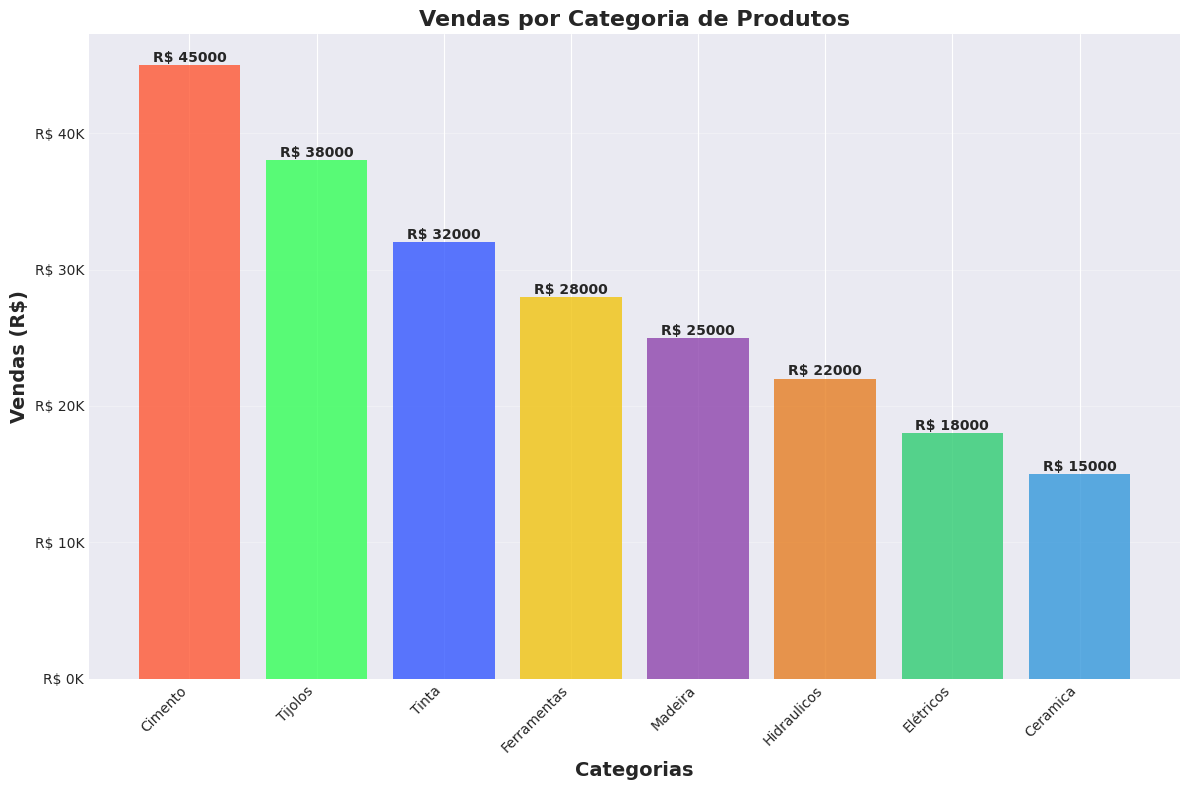

In [10]:
def vendas_categorias():
    """Gráfico de barras mostrando vendas por categria de produtos"""

    # Dados de exemplo
    categorias = ['Cimento', 'Tijolos', 'Tinta', 'Ferramentas', 'Madeira', 'Hidraulicos', 'Elétricos', 'Ceramica']
    vendas = [45000, 38000, 32000, 28000, 25000, 22000, 18000, 15000]

    # Cores personalizadas
    cores = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD', '#E67E22', '#2ECC71', '#3498DB']

    plt.figure(figsize=(12, 8))
    bars = plt.bar(categorias, vendas, color=cores, alpha=0.8)

    # adicionar valores nas barras
    for bar, valor in zip(bars, vendas):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, f'R$ {valor}', ha='center', va='bottom', fontweight='bold')

    plt.title('Vendas por Categoria de Produtos', fontsize=16, fontweight='bold')
    plt.xlabel('Categorias', fontsize=14, fontweight='bold')
    plt.ylabel('Vendas (R$)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Formatação dos valores do eixo y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))

    plt.tight_layout()
    
vendas_categorias()

## Exemplo 2 - Evolução Temporal das Vendas

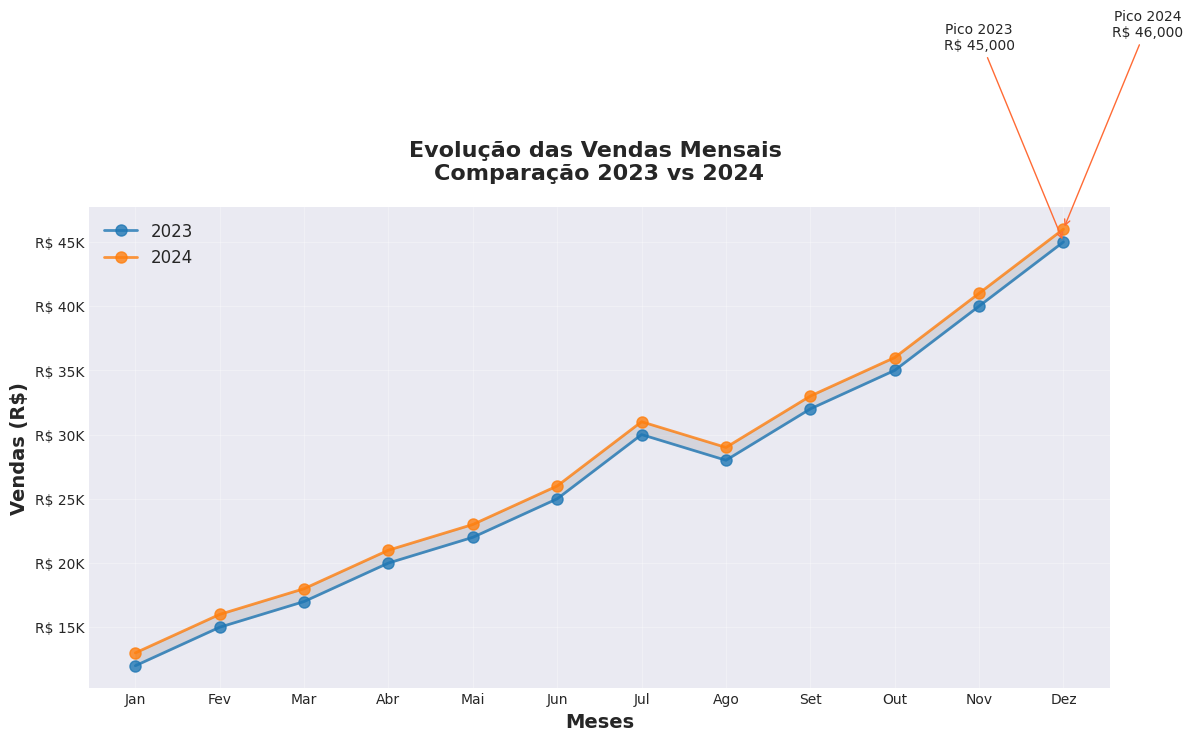

In [17]:
def evolucao_vendas():
    """Grafico de linha mostrando evolução das vendas ao longo do ano"""

    # Dados simualdos para 12 meses
    meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    vendas_2023 = [12000, 15000, 17000, 20000, 22000, 25000, 30000, 28000, 32000, 35000, 40000, 45000]
    vendas_2024 = [13000, 16000, 18000, 21000, 23000, 26000, 31000, 29000, 33000, 36000, 41000, 46000]

    plt.figure(figsize=(12, 8))

    # linhas principais
    plt.plot(meses, vendas_2023, marker='o', label='2023', color='#1f77b4', linewidth=2, markersize=8, alpha=0.8)
    plt.plot(meses, vendas_2024, marker='o', label='2024', color='#ff7f0e', linewidth=2, markersize=8, alpha=0.8)

    # Area sombreada entre as linhas
    plt.fill_between(meses, vendas_2023, vendas_2024, alpha=0.2, color='gray')

    # Destacar pontos máximos
    max_2023_idx = vendas_2023.index(max(vendas_2023))
    max_2024_idx = vendas_2024.index(max(vendas_2024))

    plt.annotate(f'Pico 2023\nR$ {max(vendas_2023):,}',
                xy=(max_2023_idx, max(vendas_2023)),
                xytext=(max_2023_idx-1, max(vendas_2023)+15000),
                arrowprops=dict(arrowstyle='->', color='#FF6B35'),
                fontsize=10, ha='center')
    
    plt.annotate(f'Pico 2024\nR$ {max(vendas_2024):,}',
                xy=(max_2024_idx, max(vendas_2024)),
                xytext=(max_2024_idx+1, max(vendas_2024)+15000),
                arrowprops=dict(arrowstyle='->', color='#FF6B35'),
                fontsize=10, ha='center')
    
    plt.title('Evolução das Vendas Mensais \nComparação 2023 vs 2024', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Meses', fontsize=14, fontweight='bold')
    plt.ylabel('Vendas (R$)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Formatação do eixo Y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))

    plt.tight_layout()

evolucao_vendas()


## Exemplo 3 - Distribuição de Preços dos Produtos

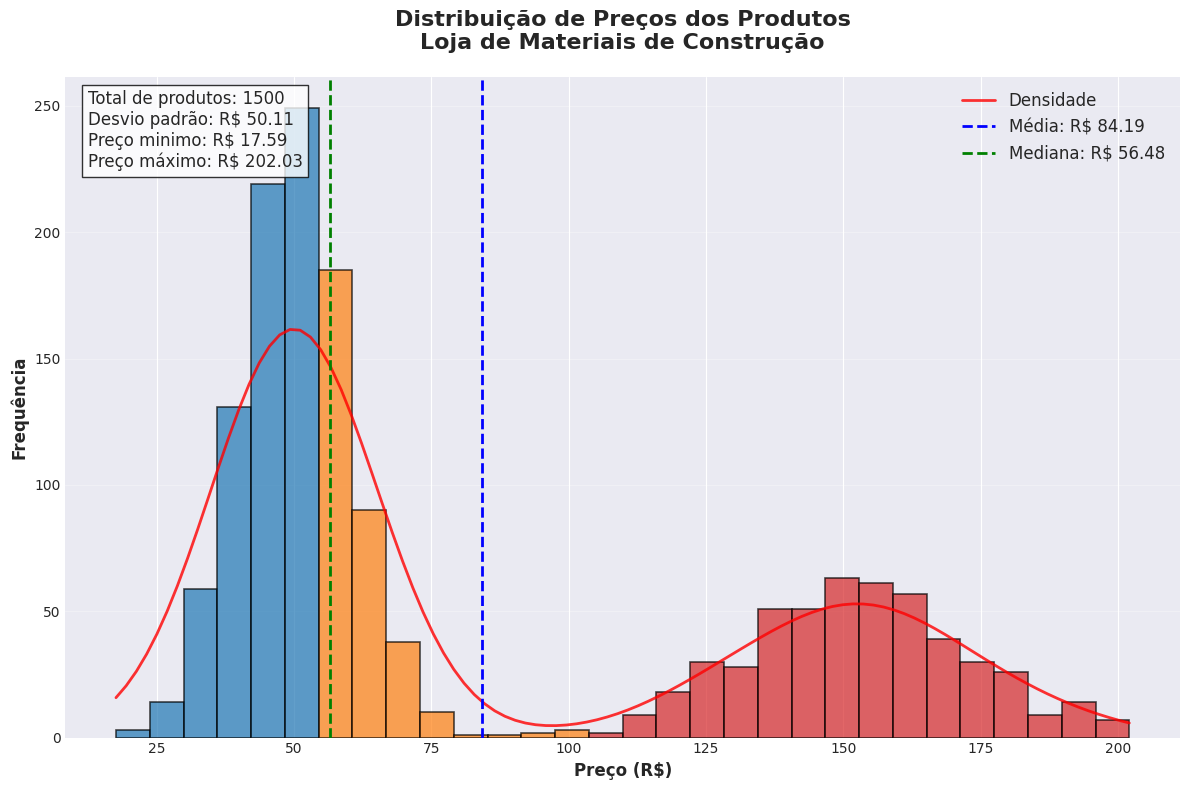

In [8]:
def distribuicao_precos():
    """Historama mostrando distribuição de preços dos produtos"""

    # Simular dados de preços (distribuição bimodal par simular produtos basicos e premium)
    np.random.seed(42)
    precos_basicos = np.random.normal(loc=50, scale=10, size=1000)  # Produtos básicos
    precos_premium = np.random.normal(loc=150, scale=20, size=500)  # Produtos premium
    todos_precos = np.concatenate([precos_basicos, precos_premium])

    # remover preços negativos
    todos_precos = todos_precos[todos_precos > 0]

    plt.figure(figsize=(12, 8))

    # Histograma com 30 bins
    n, bins, patches = plt.hist(todos_precos, bins=30, color='#2ca02c', alpha=0.7, edgecolor='black', linewidth=1.2)

    # Colorir barras do histograma
    for i in range(len(patches)):
        if bins[i] < 50:
            patches[i].set_facecolor('#1f77b4')  # Azul para preços baixos
        elif bins[i] < 100:
            patches[i].set_facecolor('#ff7f0e')  # Laranja para preços médios
        else:
            patches[i].set_facecolor('#d62728')  # Vermelho para preços altos

    # Linha de densidade
    from scipy import stats
    x = np.linspace(todos_precos.min(), todos_precos.max(), 100)
    kde = stats.gaussian_kde(todos_precos)
    plt.plot(x, kde(x) * len(todos_precos) * (bins[1] - bins[0]), color='red', linewidth=2, label='Densidade', alpha=0.8)

    # Estatisticas
    media = np.mean(todos_precos)
    mediana = np.median(todos_precos)

    plt.axvline(media, color='blue', linestyle='--', label=f'Média: R$ {media:.2f}', linewidth=2)
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: R$ {mediana:.2f}', linewidth=2)

    plt.title('Distribuição de Preços dos Produtos\nLoja de Materiais de Construção', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Preço (R$)', fontsize=12, fontweight='bold')
    plt.ylabel('Frequência', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)

    # adicionar texto com estatisticas
    plt.text(0.02, 0.98, f'Total de produtos: {len(todos_precos)}\n'
            f'Desvio padrão: R$ {np.std(todos_precos):.2f}\n'
            f'Preço minimo: R$ {np.min(todos_precos):.2f}\n'
            f'Preço máximo: R$ {np.max(todos_precos):.2f}',
            transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()

distribuicao_precos()

## Exemplo 4 - Analise de Sazonalidade por Categoria


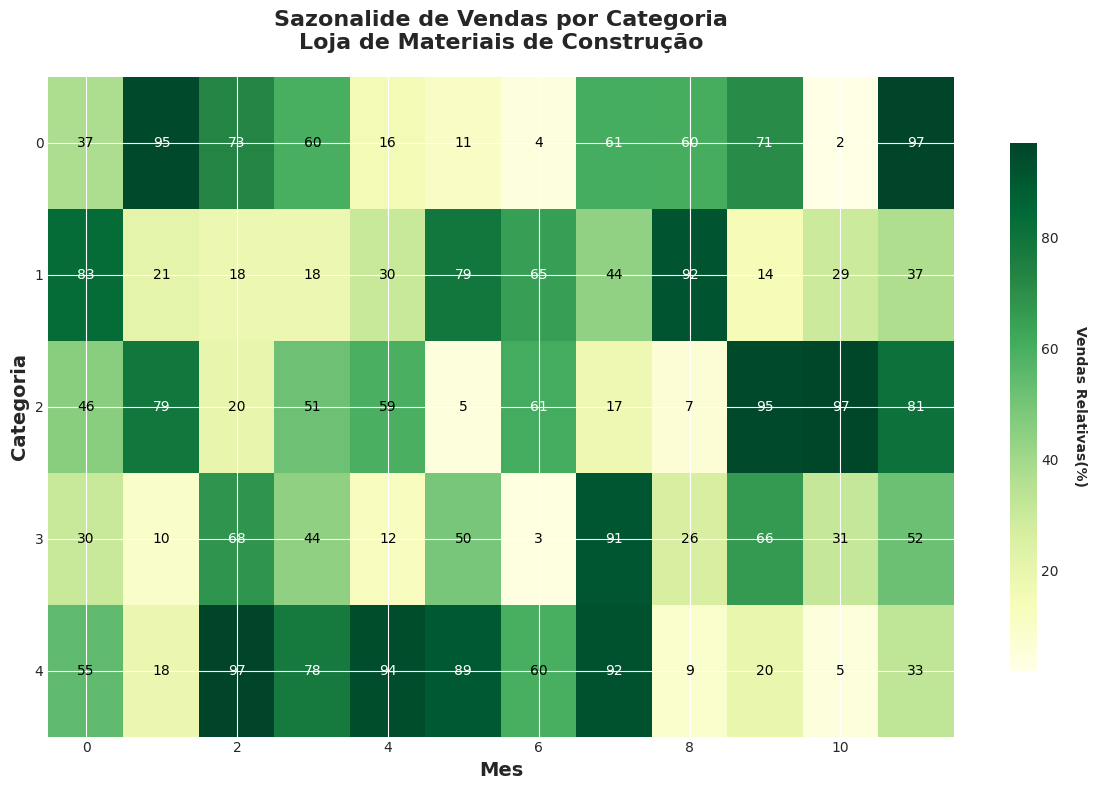

In [ ]:
def sazonalidade():
    "Grafico de calor mostrando sazonalidade das vendas por categoria"
    # Dados simualdos - vendas por mês e categoria
    categorias = ['Cimento', 'Tinta', 'Madeira', 'Cerâmica', 'Ferragens']
    meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

    # Matriz de vendas (Categoria x mês)
    np.random.seed(42)
    vendas_matriz = np.random.rand(len(categorias), len(meses)) * 100

    # adicionar padrões sazonais realistas
    for i, categoria in enumerate(categorias):
        if categoria == 'Tinta':
            vendas_matriz[i, 5:9] *= 1.5 
        elif categoria == 'Cimento':
            vendas_matriz[i, 5:8] *= 0.7
        elif categoria == 'Ceramica':
            vendas_matriz[i, 10:] *= 1.4	
    
    plt.figure(figsize=(12, 8))

    # Mapa de calor
    im = plt.imshow(vendas_matriz, cmap='YlGn', aspect='auto')

    # Confugurar ticks
    for i in range(len(categorias)):
        for j in range(len(meses)):
            plt.text(j, i, f'{vendas_matriz[i, j]:.0f}', ha='center', va='center', color='white' if vendas_matriz[i,j] > 60 else 'black')
    
    # BARRA DE CORES
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.set_label('Vendas Relativas(%)', rotation=270, labelpad=20, fontweight='bold')

    plt.title('Sazonalide de Vendas por Categoria\nLoja de Materiais de Construção', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Mes', fontsize=14, fontweight='bold')
    plt.ylabel('Categoria', fontsize=14, fontweight='bold')

    plt.tight_layout()

sazonalidade()

## Exemplo 5 - Margem de Lucro por Fornecedor

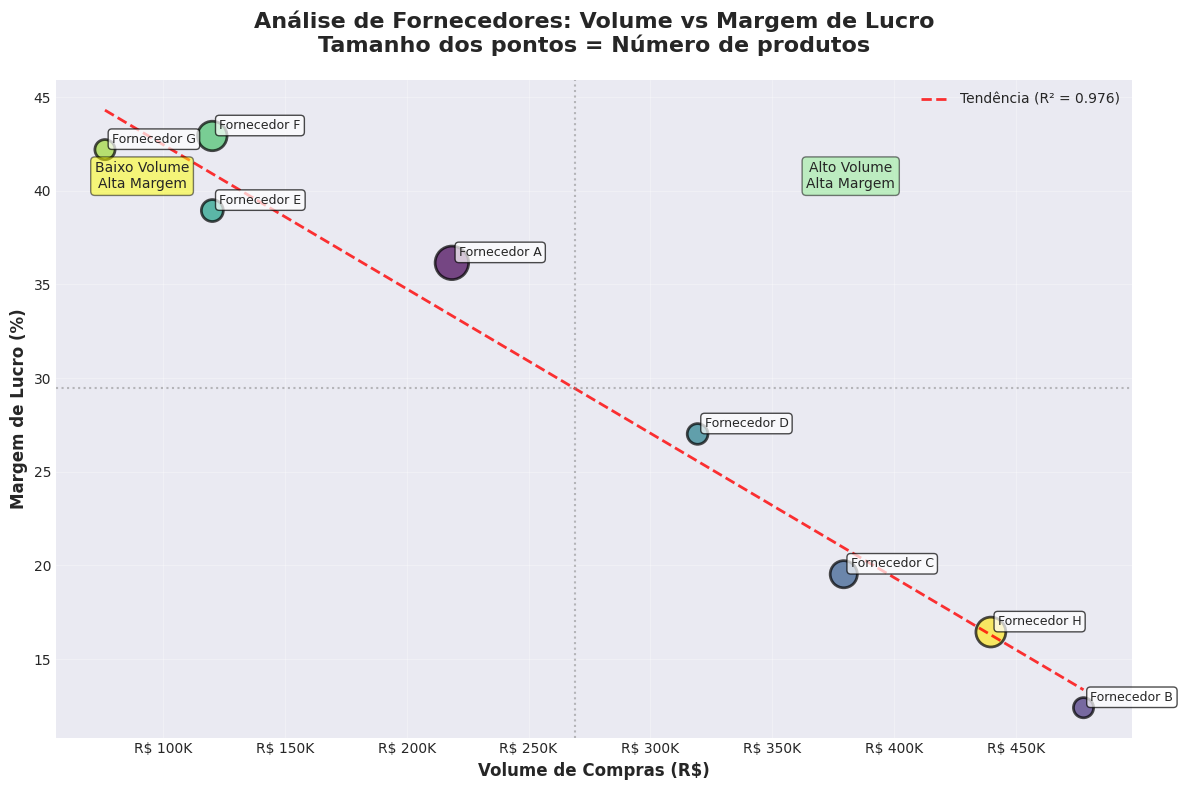

In [13]:
def margem_fornecedores():
    """Gráfico de dispersão mostrando volume vs margem por fornecedor"""
    
    # Dados simulados
    fornecedores = ['Fornecedor A', 'Fornecedor B', 'Fornecedor C', 'Fornecedor D', 
                   'Fornecedor E', 'Fornecedor F', 'Fornecedor G', 'Fornecedor H']
    
    np.random.seed(42)
    volume_compras = np.random.uniform(50000, 500000, len(fornecedores))
    margem_lucro = np.random.uniform(15, 45, len(fornecedores))
    
    # Simular relação inversa realista (maior volume = menor margem)
    margem_lucro = 50 - (volume_compras / 15000) + np.random.normal(0, 3, len(fornecedores))
    margem_lucro = np.clip(margem_lucro, 10, 50)
    
    # Tamanho dos pontos proporcional ao número de produtos
    num_produtos = np.random.randint(20, 200, len(fornecedores))
    
    plt.figure(figsize=(12, 8))
    
    # Scatter plot principal
    scatter = plt.scatter(volume_compras, margem_lucro, s=num_produtos*3, 
                         c=range(len(fornecedores)), cmap='viridis', 
                         alpha=0.7, edgecolors='black', linewidth=2)
    
    # Adicionar rótulos dos fornecedores
    for i, fornecedor in enumerate(fornecedores):
        plt.annotate(fornecedor, (volume_compras[i], margem_lucro[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    # Linha de tendência
    z = np.polyfit(volume_compras, margem_lucro, 1)
    p = np.poly1d(z)
    x_trend = np.linspace(volume_compras.min(), volume_compras.max(), 100)
    plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, 
             label=f'Tendência (R² = {np.corrcoef(volume_compras, margem_lucro)[0,1]**2:.3f})')
    
    # Quadrantes de análise
    vol_medio = np.mean(volume_compras)
    margem_media = np.mean(margem_lucro)
    
    plt.axhline(margem_media, color='gray', linestyle=':', alpha=0.5)
    plt.axvline(vol_medio, color='gray', linestyle=':', alpha=0.5)
    
    # Legendas dos quadrantes
    plt.text(volume_compras.max()*0.8, margem_lucro.max()*0.95, 
             'Alto Volume\nAlta Margem', ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    plt.text(volume_compras.min()*1.2, margem_lucro.max()*0.95, 
             'Baixo Volume\nAlta Margem', ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    plt.title('Análise de Fornecedores: Volume vs Margem de Lucro\n'
              'Tamanho dos pontos = Número de produtos', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Volume de Compras (R$)', fontsize=12, fontweight='bold')
    plt.ylabel('Margem de Lucro (%)', fontsize=12, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Formatação do eixo X
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K'))
    
    plt.tight_layout()

margem_fornecedores()